In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

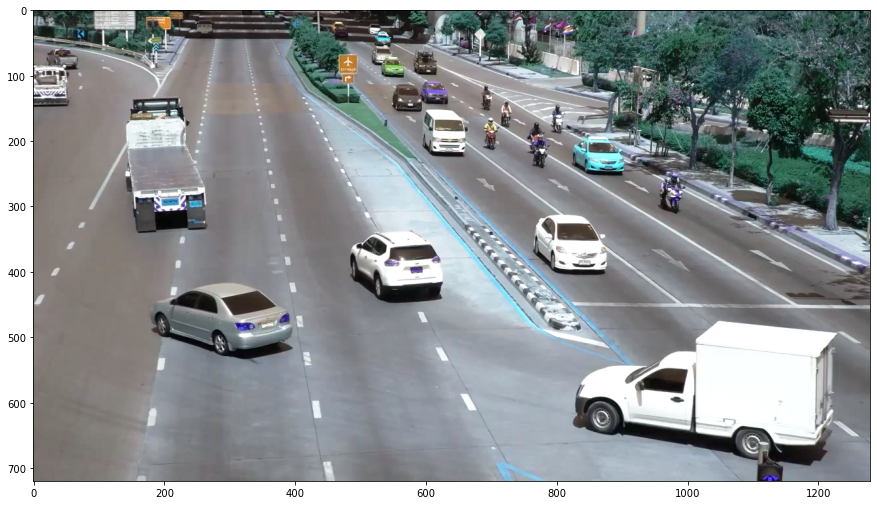

In [2]:
cap = cv2.VideoCapture('monitoring_720p.avi')
ret ,frame = cap.read()
plt.figure(figsize = (15,15))
plt.imshow(frame)
plt.show()


In [3]:
r,h,c,w = 150,76,594,72
track_window = (c,r,w,h)

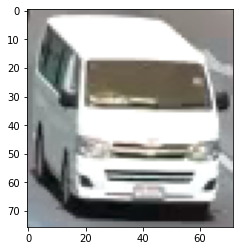

In [4]:
roi = frame[r:r+h, c:c+w]
plt.imshow(roi)
plt.show()

In [5]:
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

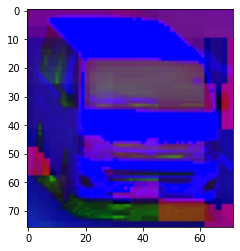

In [6]:
plt.imshow(hsv_roi)
plt.show()

In [7]:
mask = cv2. inRange(hsv_roi, np.array((0., 60. , 32.)),np.array((180.,255.,255.)))

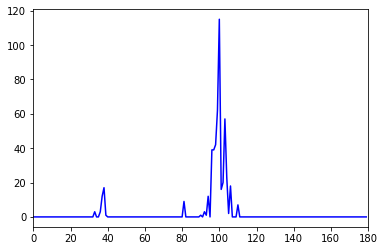

In [8]:
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
plt.plot(roi_hist, color = 'b')
plt.xlim([0,180])
plt.show()

In [16]:
roi_hist = cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

In [17]:
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10,1)

In [18]:
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        ret, track_window = cv2.meanShift(dst,track_window, term_crit)
        
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame,(x,y),(x+w,y+h),255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
cv2.destroyAllWindows()
cap.release()

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [20]:
cap = cv2.VideoCapture('monitoring_720p.avi')
ret ,frame = cap.read()
r,h,c,w = 150,76,594,72
track_window = (c,r,w,h)
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
roi_hist = cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10,1)

In [24]:
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        ret, track_window = cv2.CamShift(dst,track_window, term_crit)
        
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True,255,2)
        cv2.imshow('img2',img2)
        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)
    else:
        break
cv2.destroyAllWindows()
cap.release()